          name        x       y    z  rMin   rMax    dz  angle
0  stt01tube_1 -2.62406  17.675  0.0     0  0.503  75.0    0.0
1  stt01tube_2 -3.49874  17.170  0.0     0  0.503  75.0    0.0
2  stt01tube_3 -4.37343  16.665  0.0     0  0.503  75.0    0.0
3  stt01tube_4 -5.24811  16.160  0.0     0  0.503  75.0    0.0
4  stt01tube_5 -6.12280  15.655  0.0     0  0.503  75.0    0.0


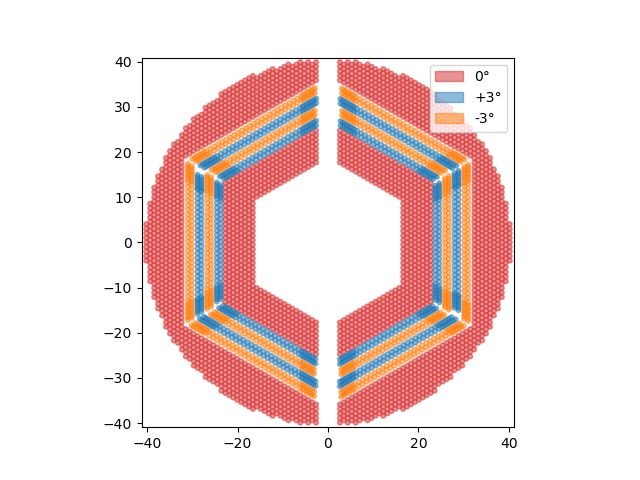

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.patches import Circle
import numpy as np

data: pd.DataFrame = pd.read_csv('tubePos.csv')
data.columns = data.columns.str.strip()

print(data.head())

xMax: float = data["x"].max()
xMin: float = data["x"].min()

yMax: float = data["y"].max()
yMin: float = data["y"].min()

numStraightTubes: int = 0
numPosSkewedTubes: int = 0
numNegSkewedTubes: int = 0

fig, ax= plt.subplots()

for index, row in data.iterrows():
	if row['angle'] == 0:
		if numStraightTubes == 0:
			straightTube = Circle((row['x'], row['y']), row['rMax'], color='tab:red', alpha=0.5, label = '0°')
		else:
			straightTube = Circle((row['x'], row['y']), row['rMax'], color='tab:red', alpha=0.5)
		ax.add_patch(straightTube)
		numStraightTubes += 1
	elif np.sign(row['angle']) == 1:
		if numPosSkewedTubes == 0:
			posSkewedTube = Circle((row['x'], row['y']), row['rMax'], color='tab:blue', alpha=0.5, label = '+3°')
		else:
			posSkewedTube = Circle((row['x'], row['y']), row['rMax'], color='tab:blue', alpha=0.5)
		ax.add_patch(posSkewedTube)
		numPosSkewedTubes += 1
	elif np.sign(row['angle']) == -1:
		if numNegSkewedTubes == 0:
			negSkewedTube = Circle((row['x'], row['y']), row['rMax'], color='tab:orange', alpha=0.5, label = '-3°')
		else:
			negSkewedTube = Circle((row['x'], row['y']), row['rMax'], color='tab:orange', alpha=0.5)
		ax.add_patch(negSkewedTube)
		numNegSkewedTubes += 1
	else:
		raise Exception("Invalid angle")
 
ax.set_xlim(xMin-1, xMax+1)
ax.set_ylim(yMin-1, yMax+1)

ax.set_aspect('equal')

plt.legend(loc='upper right')

plt.show()